# Frontdoor Candidate Questions


Congratulations on making it to this stage of the interview process!  For the next step of your candidacy, you will be asked to solve five unique problems. Each question focuses on a distinct data science skill such as data access, data transformation, hypothesis testing, model evaluation, and lastly, you will be asked to interpret a report and make a recommendation. Please use Python unless specified otherwise.  All code and derived data must be included in your final submission. Document formats such as `.ipynb`, `.html`, and `.docx` are acceptable for submission. 

We will attempt to run your code, so if it references obscure libraries, please indicate this as well as how to locate/install them.  You need to be sure you do what the core task indicates; but, you should feel free to use novel and ingenious approaches. We also expect that the challenge should *not take more than two hours* to complete.

In evaluating your submission we will be considering the following:

1. **Completeness** and **correctness** of the project and codebase.
2. **Robustness** and **clarity** of the documentation included with the submission 
3. **Language selection** and **library dependency** appropriateness.
4. **Sophistication** and **ingenuity** in thinking and approach.

Each question also contains a bonus component. The bonus questions are entirely optional, and a few-sentence summary is sufficient.  

*Hint:* Clarity means articulating your assumptions, your approach, and your, results cleanly and concisely.  *Overly verbose code and responses can be detrimental to your score*.

When you have completed the challenge, email your results to the email address you received this packet from.

>**Notice of Confidentiality:** This document, scenario, and data are proprietary to Frontdoor, Inc. And cannot be copied or distributed without the expressed written permission by Frontdoor, Inc. Failure to adhere to this notice of confidentiality will result in immediate termination of the candidate's application.

## Question 1: Data Transformation

You may often need to 'wrangle' data into a representation that is better suited for a particular project.  This next question will test your ability to clean and order data. 

You have been presented with two dataframes: 

#### Dataframe A: Brands Serviced
In the home warranty business, dispatches are created when a contractor is selected to fulfill a home warranty claim.  

This dataframe contains two columns. The first one is a unique dispatch ID represented by an integer, the second is a string containing a collection of appliance brands that were serviced by the contractor during the dispatch.

| dispatch_id | brands             |
|-----------|------------------|
| 100100     | Kenmore, GE      |
| 100101     | Whirpool    |
| 100102     | Viking      |
| 100103     | GE      |
| 100104     | GE      |
| 100105     | Viking, Maytag     |
| 100106     | Maytag      |
| 100107     | Kenmore, GE, Maytag      |
| 100108     | Viking      |
| 100109     | GE      |
...


#### Dataframe B: Dispatch Assignments
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a dispatch ID.  The dispatch IDs from column two are the same as the dispatch IDs from column one of dataframe A.

| contractor | dispatch_id |
|----------|---------|
| A        | 100100     |
| A        | 100101     |
| B        | 100102      |
| C        | 100103      |
| C        | 100104      |
| B        | 100105      |
| A        | 100106      |
| C        | 100107      |
| B        | 100108      |
| A        | 100109      |

You are asked to write a function that receives two input data frames (Dataframe_A, Dataframe_B)and returns a dataframe with the following format, where the contents of cells represent the count of each brand type serviced by a respective contractor.  This function should accommodate the occurrence of new brand types that may be introduced to the data set over time (e.g., SmartHomeTech Appliances).

| Contractor | GE   | Kenmore    | Whirpool  | ... |
|----------|---------|---------|--------|-------------|
| A        | ?       | ?       | ?      | ?           |
| B        | ?       | ?       | ?      | ?           |
| C        | ?       | ?       | ?      | ?           |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  

*Bonus Question:* If the two starting tables were in a relational database or Hadoop cluster and each had 100 million rows, how might your approach change?

In [138]:
import pandas as pd

tableA = [
    (100100, "Kenmore, GE"),
    (100101, "Whirpool"),
    (100103, "Viking"),
    (100104, "GE"),
    (100105, "GE"),
    (100106, "Viking, Maytag"),
    (100107, "Kenmore, GE, Maytag"),
    (100108, "Viking"),
    (100109, "GE"),
]
labels = ["dispatch_id", "brands"]
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [
    ("A", 100100),
    ("A", 100101),
    ("B", 100102),
    ("C", 100103),
    ("C", 100104),
    ("B", 100105),
    ("A", 100106),
    ("C", 100107),
    ("B", 100108),
    ("A", 100109),
]
labels = ["contractor", "dispatch_id"]
dfB = pd.DataFrame.from_records(tableB, columns=labels)

### Answer 1: Data Transformation

#### 'wrangle'

In [139]:
import swifter

In [140]:
def contractor_brand_count_aggregate(input_df_1, input_df_2):
    merged_df = pd.merge(input_df_1, input_df_2, on='dispatch_id', how='inner')
    merged_df['brands_list'] = merged_df.brands.swifter.set_npartitions(
        32).apply(lambda x: [y.lstrip().rstrip() for y in x.split(',')])
    merged_df = merged_df.explode('brands_list')
    return pd.crosstab(merged_df.contractor,
                       merged_df.brands_list).reset_index().rename_axis(None,
                                                                        axis=1)

In [141]:
contractor_brand_count_aggregate(dfA, dfB).style.hide_index()

contractor,GE,Kenmore,Maytag,Viking,Whirpool
A,2,1,1,1,1
B,1,0,0,1,0
C,2,1,1,1,0


    ** Additional Library Support :
            a. !pip install swifter
    ** Assumptions :
            a. Brand Columns will not have names in mix case or camel-case. If in future this changes necessary steps needs
               to be taken as to either convert all names in lower case or in upper case to make uniform grouping.
            b. No Spelling mistakes in brand names. or else will have to pre-process for that accordingly via edit-distance 
    ** Comments :
            a. Instead customer name in the question it should be contractor name
            b. I chose "Inner-Join" because the question requires the co-occurrence matrix for Contractor and Brand so, row
               containing both information are only used.
            c. I would not call trailing and leading spaces in the brand names as bottle-neck as data in it's raw form
               is expected to have discrepancies. I dealt with it in a list comprehension to avoid creation of additional
               column to preform pre-processing.

#### Bonus 

    ** If this were a relation DB or hadoop cluster with spark engine on top of it I would use a sub-query to extract the
       exploded brand name column and contractor column to run group by logic and aggregate count to get the desired result
       efficiently.
    ** If I had to use Python on such huge quantum of data for pre-processing or "wrangling" I would use the following
       to speed up my process :
            a. apply + lambda (example shown above)
            b. nummpy vectorized for vectorized implementation of a function
            c. swifter + apply + lambda which helps to divide data data based on the ram and beef-up the performance.
               (example shown above)

## Question 2: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables, `Contractor_Invoice_Detail` and `Item_Detail`, that are stored in a relational format.  `Contractor_Invoice_Detail` contains transactional information and possesses the following schema:

#### Table Contractor_Invoice_Detail Schema

> **invoice_id:** The unique id for invoice submitted by a contractor after servicing a customer claim.
>
> **invoice_line:** A unique id for each item associated with an invoice (e.g., both a refrigerator and a dishwasher may show up on the invoice)
>
> **market_id:** The market region where the contractor performed services.
>
> **time_stamp:** The date of the services.
>
> **covered_item:** The unique id for the item serviced. Every item type has a unique id.
>
> **hours:** The number of hours billed by the contractor
>
> **rate:** The contractor's billable rate (hourly).
>
> **part_cost:** The gross cost of replacement parts.
>
> **service_fee:** The fee collected from the homeowner at the time of service.  *Note:* The service fee will only show up on the first invoice_line for each invoice_id.

| invoice_id | invoice_line | market_id | time_stamp | covered_item | hours | rate  | part_cost | service_fee | 
|------------|--------------|----------|------------|---------------|-------|----------|-----------|-----------| 
| 10000001   | 31215        | 3        | 9/3/19     | 3000          | 1.5   | 65       | 0         | 35 | 
| 10000001   | 31216        | 3        | 9/3/19     | 3354H         | 3     | 65       | 18.00     | 0  |
| 10000002   | 91455        | 1        | 9/5/19     | 1234          | 2     | 80       | 20.00     | 35 |
| 10000003   | 59943        | 2        | 9/5/19     | 3000          | .5    | 70       | 0         | 35 |
| 10000004   | 95027        | 2        | 9/5/19     | 18518         | 1     | 95       | 70.50     | 55 |
| 10000005   | 73994        | 2        | 9/5/19     | 12HA12        | 4     | 90       | 0         | 35 |
| 10000006   | 98464        | 1        | 10/1/19    | wh30000       | 1     | 65       | 45.00     | 35 |


#### Table Item_Detail Schema
> **covered_item:** The unique id for the item serviced. Every item type has a unique id.
>
> **item_description:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| item_id | item_description     | key_internal|
|---------|---------     |  ---------  |
| 3000    | Washer       |  17375273   |
| 3354H   | Dryer        |  15477787   |
| 1234    | Microwave    |  97845235   |
| 18518   | Dishwasher   |  47813334   |
| 12HA12  | Oven         |  48573988   |
| wh30000 | Refrigerator |  00000000   |

Your task is to construct a single SQL query that returns the **total expense** (`rate` * `hours` + `part_cost` - `adjusted_service_fee`) and the **average expense** by the market_id and item description for invoices in 2019, with the output ordered by decreasing **average expense**.

*Important Note:* If there are multiple invoice lines for an invoice, the service fee will only show up on one invoice line. In calculating the total and average expenses, an adjusted service fee should be used.  For example, if there are 3 invoicelines associated with an invoice id, having service feees of \$30, \$0, and \$0, the service fee amount applied to each invoice line should be $10.

*Bonus Question:* How would you use Python to access this data and perform these operations?

### Answer 2 : Data Access

#### SQL 

    CREATE VIEW joined_ AS SELECT C.*, I.* FROM Contractor_Invoice_Detail AS C LEFT JOIN Item_Detail AS I ON C.covered_item=I.covered_item;

    CREATE VIEW adj_service_fee AS SELECT C.invoice_id as 'invoice_id',AVG(C.service_fee) as 'adjusted_service_fee' FROM Contractor_Invoice_Detail AS C LEFT JOIN Item_Detail AS I ON C.covered_item=I.covered_item GROUP BY C.invoice_id;

    CREATE VIEW expense AS SELECT *,(joined_.rate*joined_.hours+joined_.part_cost-adj_service_fee.adjusted_service_fee) AS 'expense', SUBSTR(joined_.time_stamp,7,4) AS 'year' FROM joined_ LEFT JOIN adj_service_fee ON joined_.invoice_id=adj_service_fee.invoice_id

    SELECT market_id,item_description,SUM(expense),AVG(expense) FROM expense WHERE year='2019' GROUP BY market_id,item_description ORDER BY 4 DESC


#### Python

In [142]:
Contractor_Invoice_Detail = pd.DataFrame({
    'invoice_id':
    pd.Series(
        [10000001, 10000001, 10000002, 10000003, 10000004, 10000005, 10000006],
        dtype=int),
    'invoice_line':
    pd.Series([31215, 31216, 91455, 59943, 95027, 73994, 98464], dtype=int),
    'market_id':
    pd.Series([3, 3, 1, 2, 2, 2, 1], dtype=int),
    'time_stamp':
    pd.to_datetime(pd.Series([
        '09-03-2019', '09-03-2019', '09-05-2019', '09-05-2019', '09-05-2019',
        '09-05-2019', '10-01-2019'
    ],
        dtype=str),
        format='%d-%m-%Y'),
    'covered_item':
    pd.Series(['3000', '3354H', '1234', '3000', '18518', '12HA12', 'wh30000'],
              dtype=str),
    'hours':
    pd.Series([1.5, 3, 2, 0.5, 1, 4, 1], dtype=float),
    'rate':
    pd.Series([65, 65, 80, 70, 95, 90, 65], dtype=float),
    'part_cost':
    pd.Series([0, 18, 20, 0, 70.5, 0, 45], dtype=float),
    'service_fee':
    pd.Series([35, 0, 35, 35, 55, 35, 35], dtype=float)
})
Contractor_Invoice_Detail

,invoice_id,invoice_line,market_id,time_stamp,covered_item,hours,rate,part_cost,service_fee
0,10000001,31215,3,2019-03-09,3000,1.5,65.0,0.0,35.0
1,10000001,31216,3,2019-03-09,3354H,3.0,65.0,18.0,0.0
2,10000002,91455,1,2019-05-09,1234,2.0,80.0,20.0,35.0
3,10000003,59943,2,2019-05-09,3000,0.5,70.0,0.0,35.0
4,10000004,95027,2,2019-05-09,18518,1.0,95.0,70.5,55.0
5,10000005,73994,2,2019-05-09,12HA12,4.0,90.0,0.0,35.0
6,10000006,98464,1,2019-01-10,wh30000,1.0,65.0,45.0,35.0


In [143]:
Item_Detail = pd.DataFrame({
    'covered_item':
    pd.Series(['3000', '3354H', '1234', '18518', '12HA12', 'wh30000'],
              dtype=str),
    'item_description':
    pd.Series(
        ['Washer', 'Dryer', 'Microwave', 'Dishwasher', 'Oven', 'Refrigerator'],
        dtype=str),
    'key_internal':
    pd.Series([
        '17375273', '15477787', '97845235', '47813334', '48573988', '00000000'
    ],
        dtype=str)
})
Item_Detail

,covered_item,item_description,key_internal
0,3000,Washer,17375273
1,3354H,Dryer,15477787
2,1234,Microwave,97845235
3,18518,Dishwasher,47813334
4,12HA12,Oven,48573988
5,wh30000,Refrigerator,00000000


In [144]:
merged_df = pd.merge(Contractor_Invoice_Detail,
                     Item_Detail,
                     on='covered_item',
                     how='left')

In [145]:
merged_df_adjusted_service_fee = pd.merge(
    merged_df,
    merged_df.groupby('invoice_id')['service_fee'].mean().reset_index(),
    on='invoice_id',
    how='left')
merged_df_adjusted_service_fee.columns = [
    'invoice_id', 'invoice_line', 'market_id', 'time_stamp', 'covered_item',
    'hours', 'rate', 'part_cost', 'service_fee', 'item_description',
    'key_internal', 'adjusted_service_fee'
]
del merged_df
merged_df_adjusted_service_fee

,invoice_id,invoice_line,market_id,time_stamp,covered_item,hours,rate,part_cost,service_fee,item_description,key_internal,adjusted_service_fee
0,10000001,31215,3,2019-03-09,3000,1.5,65.0,0.0,35.0,Washer,17375273,17.5
1,10000001,31216,3,2019-03-09,3354H,3.0,65.0,18.0,0.0,Dryer,15477787,17.5
2,10000002,91455,1,2019-05-09,1234,2.0,80.0,20.0,35.0,Microwave,97845235,35.0
3,10000003,59943,2,2019-05-09,3000,0.5,70.0,0.0,35.0,Washer,17375273,35.0
4,10000004,95027,2,2019-05-09,18518,1.0,95.0,70.5,55.0,Dishwasher,47813334,55.0
5,10000005,73994,2,2019-05-09,12HA12,4.0,90.0,0.0,35.0,Oven,48573988,35.0
6,10000006,98464,1,2019-01-10,wh30000,1.0,65.0,45.0,35.0,Refrigerator,00000000,35.0


In [146]:
merged_df_adjusted_service_fee['expense'] = merged_df_adjusted_service_fee[
    'rate'] * merged_df_adjusted_service_fee[
        'hours'] + merged_df_adjusted_service_fee[
            'part_cost'] - merged_df_adjusted_service_fee[
                'adjusted_service_fee']

In [147]:
merged_df_adjusted_service_fee['year'] = merged_df_adjusted_service_fee[
    'time_stamp'].dt.year

In [148]:
merged_df_adjusted_service_fee

,invoice_id,invoice_line,market_id,time_stamp,covered_item,hours,rate,part_cost,service_fee,item_description,key_internal,adjusted_service_fee,expense,year
0,10000001,31215,3,2019-03-09,3000,1.5,65.0,0.0,35.0,Washer,17375273,17.5,80.0,2019
1,10000001,31216,3,2019-03-09,3354H,3.0,65.0,18.0,0.0,Dryer,15477787,17.5,195.5,2019
2,10000002,91455,1,2019-05-09,1234,2.0,80.0,20.0,35.0,Microwave,97845235,35.0,145.0,2019
3,10000003,59943,2,2019-05-09,3000,0.5,70.0,0.0,35.0,Washer,17375273,35.0,0.0,2019
4,10000004,95027,2,2019-05-09,18518,1.0,95.0,70.5,55.0,Dishwasher,47813334,55.0,110.5,2019
5,10000005,73994,2,2019-05-09,12HA12,4.0,90.0,0.0,35.0,Oven,48573988,35.0,325.0,2019
6,10000006,98464,1,2019-01-10,wh30000,1.0,65.0,45.0,35.0,Refrigerator,00000000,35.0,75.0,2019


In [149]:
merged_df_adjusted_service_fee[
    merged_df_adjusted_service_fee.year == 2019].groupby([
        'market_id', 'item_description'
    ]).agg(total_expense=('expense', sum),
           average_expense=('expense', 'mean')).reset_index().sort_values(
               by='average_expense', ascending=False).style.hide_index()

market_id,item_description,total_expense,average_expense
2,Oven,325.000000,325.000000
3,Dryer,195.500000,195.500000
1,Microwave,145.000000,145.000000
2,Dishwasher,110.500000,110.500000
3,Washer,80.000000,80.000000
1,Refrigerator,75.000000,75.000000
2,Washer,0.000000,0.000000


In [150]:
del merged_df_adjusted_service_fee, Item_Detail, Contractor_Invoice_Detail

## Question 3: Hypothesis Testing
After starting at Frontdoor, you've been asked to help with a marketing campaign on a promotional webpage aimed.  You have been asked to analyze the results of a randomized, controlled experiment and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four possible adverts, each depicting a contractor fixing a different home item (e.g., a kitchen faucet or an air conditioning unit).  Visitors are then tracked to see which ones end up purchasing a home warranty plan.  Based on the data provided, what would your recommendation be?  Would you recommend one of the four adverts be presented to all visitors?

| Advert   | Views     | Home Warranty Purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 

*Bonus Question:* How would your analysis change if the visitors and purchase counts numbered in the millions? 

### Answer 3: A/B Testing

#### Hypothesis Testing

    ** Comments :
            a. I have perceived this problem as A/B Testing and since, no baseline is given to compare each Advert with
               I will choose one Advert as the Control Set and compare rest of the advert with control.
                
    ** Assumptions :
            0. Probability/Chance of Conversion = # Users who purchased warranty / # users visited the page 
            a. I would consider the chance of conversion (Purchase of Home Warranty) to follow Binomial Distribution.
                i.   As the outcome of a visit is either success or failure.
                ii.  Independence between events.
                iii. probability for any conversion is 50%
               Well, the benefit of knowing that it should follow binomial distribution is that I can use pooled standard-
               error formula to estimate how variable one can expect over-all probability of conversion to be.
            b. Rule of thumb sample size * p-hat > 5 or sample size *(1-p-hat) > 5 we can assume Binomial as Normal basically
               as the sample size increase binomial tends to be normal.
            c. I will choose Z/t -test based on the below logic 
![alt text](when_z_when_t.JPG "Title")   
            
            d. Alpha i.e statistical significance = 0.05
            e. Beta i.e statical power = 0.2
            f. Confidence Interval = 95%
            g. Two-Tailed test will be preformed
            h. I choose Advert D as my Control Group as ideally the control group has most data as that the status-quo.
        

##### Experimentation

In [151]:
import pandas as pd
import numpy as np

In [152]:
from scipy.stats import norm

In [153]:
data = pd.DataFrame({'Advert': ['A', 'B', 'C', 'D'],
                     'Views': [21, 180, 250, 100],
                     'Home-Warranty-Purchases': [3, 30, 50, 15]
                     })
data.style.hide_index()

Advert,Views,Home-Warranty-Purchases
A,21,3
B,180,30
C,250,50
D,100,15


In [154]:
data['conversion_probability'] = data['Home-Warranty-Purchases']/data['Views']
data['N*p-hat'] = data['Views']*data['conversion_probability']
data['N*(1-p-hat)'] = data['Views']*(1-data['conversion_probability'])

In [155]:
data

,Advert,Views,Home-Warranty-Purchases,conversion_probability,N*p-hat,N*(1-p-hat)
0,A,21,3,0.142857,3.0,18.0
1,B,180,30,0.166667,30.0,150.0
2,C,250,50,0.200000,50.0,200.0
3,D,100,15,0.150000,15.0,85.0


    ** as observed either of the value in N*p-hat || N*(1-p-hat) > 5 thus Normality can be assumed 

In [156]:
p_control = data[data.Advert == 'D']['conversion_probability'].values[0]

##### A/B Tests D Vs A

    Experiment/Treatment Set :-  A

In [160]:
p_exp = data[data.Advert == 'A']['conversion_probability'].values[0]

    ** Null Hypothesis : There is no difference in the control and experiment group's conversion rate and the visible
       difference is just by random change.
       i.e. p_control-p_exp = 0
    ** Alternate Hypothesis : The visible change is not by chance and Advert A changes may be the reason behind it.
       i.e. p_control-p_exp != 0
    ** Practical Significance level = 0.1 i.e. if the difference is greater than 10% and with in 95% C.I will recommend A
        

In [157]:
p_pool = (data[data.Advert == 'D']['Home-Warranty-Purchases'].values[0] +
          data[data.Advert == 'A']['Home-Warranty-Purchases'].values[0]) / (
    data[data.Advert == 'D']['Views'].values[0] +
    data[data.Advert == 'A']['Views'].values[0])

In [158]:
se_pool = np.sqrt(
    p_pool*(1 - p_pool)*((1 / data[data.Advert == 'D']['Views'].values[0]) +
                         (1 / data[data.Advert == 'A']['Views'].values[0])))

    ** Now as the sample size is less than 30 T-test is logical choice:
            a. t-vale for 95% CI and Degree of Freedom : n-1 =  2.086 from the T-table
            b. so to calculate margin of error se_pool*t-value
            c. margin with 95% Confidence = (p_cont-p_exp)-margin -- (p_cont-p_exp)+margin
            d. d_hat = p-control - p_experiment

In [161]:
d_hat = p_control-p_exp

In [162]:
margin = se_pool*2.086

In [67]:
margin-d_hat

0.17104037661775354

In [68]:
margin+d_hat

0.18532609090346783

In [71]:
test_statistic = 1-norm.cdf(d_hat,0,se_pool)

In [73]:
test_statistic

0.4666785729796864

    ** Conclusion : 
            
            1. test_statistic is 0.467 and doesn't lie in the margin+-d_hat range hence,
               I would not recommend A as (Null-hypothesis) 
               H0 cannot be discarded.
            2. The practical-significance was set as 10% i.e. 
               if the change is greater than that then only will recommend the launch for A advert but, the margin
               is between 17.1% -- 18.5% Hence, no-go for A 
        

##### A/B Tests D Vs B

    Experiment/Treatment Set :-  B

In [74]:
p_exp = data[data.Advert == 'B']['conversion_probability'].values[0]

    ** Null Hypothesis : There is no difference in the control and experiment group's conversion rate and the visible
       difference is just by random change.
       i.e. p_control-p_exp = 0
    ** Alternate Hypothesis : The visible change is not by chance and Advert A changes may be the reason behind it.
       i.e. p_control-p_exp != 0
    ** Practical Significance level = 0.1 i.e. if the difference is greater than 10% and with in 95% C.I will recommend B       

In [75]:
p_pool = (data[data.Advert == 'D']['Home-Warranty-Purchases'].values[0] +
          data[data.Advert == 'B']['Home-Warranty-Purchases'].values[0]) / (
    data[data.Advert == 'D']['Views'].values[0] +
    data[data.Advert == 'B']['Views'].values[0])

In [76]:
se_pool = np.sqrt(
    p_pool*(1 - p_pool)*((1 / data[data.Advert == 'D']['Views'].values[0]) +
                         (1 / data[data.Advert == 'B']['Views'].values[0])))

    ** Now as the sample size is greater than 30 Z-test is logical choice:
            a. z-vale for 95% CI =  1.96 from the Z-table
            b. so to calculate margin of error se_pool*z-value
            c. margin with 95% Confidence = (p_cont-p_exp)-margin -- (p_cont-p_exp)+margin
            d. d_hat = p-experiment - p-control

In [77]:
d_hat = p_exp-p_control

In [78]:
margin = se_pool*1.96

In [79]:
margin-d_hat

0.07311362070199796

In [80]:
margin+d_hat

0.10644695403533129

In [83]:
test_statistic = 1-norm.cdf(d_hat, 0, se_pool)

In [84]:
test_statistic

0.35798455788466454

    ** Conclusion : 
            
           1. test_statistic is 0.358 and doesn't lie in the margin+-d_hat range hence,
              I would not recommend B as (Null-hypothesis) 
              H0 cannot be discarded.
           2. The practical-significance was set as 10% i.e. 
              if the change is greater than that then only will recommend the launch for B advert but, the margin
              is between 7.3% -- 10.6% and the upper bound is slightly greater than practical significance level
              Hence, no-go for B 
        

##### A/B Tests D Vs C

    Experiment/Treatment Set :-  C

In [85]:
p_exp = data[data.Advert == 'C']['conversion_probability'].values[0]

    ** Null Hypothesis : There is no difference in the control and experiment group's conversion rate and the visible
       difference is just by random change.
       i.e. p_control-p_exp = 0
    ** Alternate Hypothesis : The visible change is not by chance and Advert A changes may be the reason behind it.
       i.e. p_control-p_exp != 0
    ** Practical Significance level = 0.1 i.e. if the difference is greater than 10% and with in 95% C.I will recommend B       

In [86]:
p_pool = (data[data.Advert == 'D']['Home-Warranty-Purchases'].values[0] +
          data[data.Advert == 'C']['Home-Warranty-Purchases'].values[0]) / (
    data[data.Advert == 'D']['Views'].values[0] +
    data[data.Advert == 'C']['Views'].values[0])

In [87]:
se_pool = np.sqrt(
    p_pool*(1 - p_pool)*((1 / data[data.Advert == 'D']['Views'].values[0]) +
                         (1 / data[data.Advert == 'C']['Views'].values[0])))

    ** Now as the sample size is greater than 30 Z-test is logical choice:
            a. z-vale for 95% CI =  1.96 from the Z-table
            b. so to calculate margin of error se_pool*z-value
            c. margin with 95% Confidence = (p_cont-p_exp)-margin -- (p_cont-p_exp)+margin
            d. d_hat = p-experiment - p-control

In [88]:
d_hat = p_exp-p_control

In [89]:
margin = se_pool*1.96

In [90]:
margin-d_hat

0.04018434453939329

In [91]:
margin+d_hat

0.14018434453939332

In [92]:
test_statistic = 1-norm.cdf(d_hat, 0, se_pool)

In [93]:
test_statistic

0.1385928622166963

    ** Conclusion : 
            
        1. test_statistic is 0.1386 and it lies in the margin+-d_hat range hence,
           I would recommend C as (Null-hypothesis) 
           H0 can be discarded.
        2. The practical-significance was set as 10% i.e. 
           if the change is greater than that then only will recommend the launch for C advert and the margin
           is between 4% -- 14% Hence, minimum 4% increase can be expected with Advert C. So, go with Advert C 
        

##### Final Comment

    ** I would recommend Advert C for all the visitors.

#### Bonus 

    ** With increase in sample size more confidence can be build on these results.
    ** As the sample size increases beta will decrease that means "Sensitivity" will increase.
    ** I would use Z-Test for all comparison A/B Test as the sample size will increase.

## Question 4: Forecasting

For this question, you will be provided with ficticious data related to the count of calls recieved at our call center for the past one hundred days.  You are now asked to create a forecast for the next sixty days using this data.  

In [21]:
callData = {'date': ["1/1/2020", "1/2/2020", "1/3/2020", "1/4/2020", "1/5/2020", "1/6/2020", "1/7/2020", "1/8/2020", "1/9/2020", "1/10/2020",
                     "1/11/2020", "1/12/2020", "1/13/2020", "1/14/2020", "1/15/2020", "1/16/2020", "1/17/2020", "1/18/2020", "1/19/2020", "1/20/2020",
                     "1/21/2020", "1/22/2020", "1/23/2020", "1/24/2020", "1/25/2020", "1/26/2020", "1/27/2020", "1/28/2020", "1/29/2020", "1/30/2020",
                     "1/31/2020", "2/1/2020", "2/2/2020", "2/3/2020", "2/4/2020", "2/5/2020", "2/6/2020", "2/7/2020", "2/8/2020", "2/9/2020", "2/10/2020",
                     "2/11/2020", "2/12/2020", "2/13/2020", "2/14/2020", "2/15/2020", "2/16/2020", "2/17/2020", "2/18/2020", "2/19/2020", "2/20/2020",
                     "2/21/2020", "2/22/2020", "2/23/2020", "2/24/2020", "2/25/2020", "2/26/2020", "2/27/2020", "2/28/2020", "3/1/2020", "3/2/2020", "3/3/2020",
                     "3/4/2020", "3/5/2020", "3/6/2020", "3/7/2020", "3/8/2020", "3/9/2020", "3/10/2020", "3/11/2020", "3/12/2020", "3/13/2020", "3/14/2020",
                     "3/15/2020", "3/16/2020", "3/17/2020", "3/18/2020", "3/19/2020", "3/20/2020", "3/21/2020", "3/22/2020", "3/23/2020", "3/24/2020",
                     "3/25/2020", "3/26/2020", "3/27/2020", "3/28/2020", "3/29/2020", "3/30/2020", "3/31/2020", "4/1/2020", "4/2/2020", "4/3/2020",
                     "4/4/2020", "4/5/2020", "4/6/2020", "4/7/2020", "4/8/2020", "4/9/2020", "4/10/2020"],
            'calls': [16215, 16484, 15877, 14780, 12622, 12607, 12362, 12912, 12367, 13991, 14562, 14761, 13735, 13386, 12023, 11504, 11795, 13127, 12971, 14433, 16094, 17120, 17184, 18188, 16540, 16693, 16031, 14601, 15447, 15716, 15042, 15039, 14197, 12339, 13095, 12764, 11386, 10621, 11256, 10997, 12614, 12480, 14006, 14436, 13711, 12115, 11612, 12812, 13036, 12844, 11745, 13598, 12914, 13813, 14634, 14995, 16356, 15731, 17142, 18383, 18686, 21692, 21800, 21502, 21786, 20292, 19104, 18193, 18341, 17314, 16861, 16853, 17992, 18246, 18968, 17741, 16718, 16335, 15898, 15666, 16600, 18110, 18401, 18370, 18346, 17691, 18643, 18489, 19289, 17290, 16668, 17804, 16989, 17976, 16239, 15444, 14951, 13434, 13655, 13105]}

call_df = pd.DataFrame(data=callData)

In [22]:
print(call_df.shape)
call_df.head()

(100, 2)


,date,calls
0,1/1/2020,16215
1,1/2/2020,16484
2,1/3/2020,15877
3,1/4/2020,14780
4,1/5/2020,12622


### Answer 4 : Forecast

In [98]:
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Pre-Process Data For Time Series 

In [41]:
ts = pd.DataFrame()
ts = call_df.copy()
ts['date'] = pd.to_datetime(ts['date'], format='%m/%d/%Y')
call_df['date'] = pd.to_datetime(call_df['date'], format='%m/%d/%Y')

In [42]:
ts.index=ts.date

In [43]:
ts.drop(columns=['date'],inplace=True)

In [44]:
ts=ts.calls

In [45]:
ts.head()

date
2020-01-01    16215
2020-01-02    16484
2020-01-03    15877
2020-01-04    14780
2020-01-05    12622
Name: calls, dtype: int64

In [46]:
ts['2020']

date
2020-01-01    16215
2020-01-02    16484
2020-01-03    15877
2020-01-04    14780
2020-01-05    12622
              ...  
2020-04-06    15444
2020-04-07    14951
2020-04-08    13434
2020-04-09    13655
2020-04-10    13105
Name: calls, Length: 100, dtype: int64

In [52]:
call_df['day'] = call_df['date'].dt.day

In [49]:
call_df['day_of_week'] = call_df['date'].dt.dayofweek

In [58]:
call_df['is_weekend'] = call_df.day_of_week.apply(
    lambda x: 1 if x in [4, 5, 6] else 0)
call_df['start_of_week'] = call_df.day_of_week.apply(
    lambda x: 1 if x in [0, 1] else 0)
call_df['mid_week'] = call_df.day_of_week.apply(
    lambda x: 1 if x in [2, 3] else 0)

#### Check For Stationarity

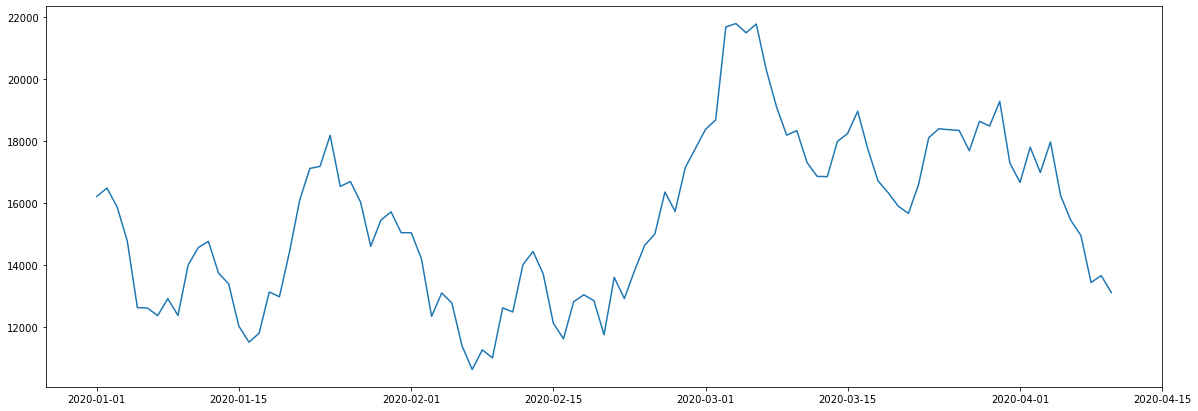

In [13]:
plt.figure(figsize=(20, 7))
plt.plot(call_df)

    ** Observations :
            1. One can see higher calls during the start of the month i.e. first 10 days i.e. ~40% of the total calls 
               made over the month. 
            2. Hence, some seasonality/trend is embedding in the data.
            3. So, I will use rolling average and Dickey-Fuller Test isolating stationarity in the data set
            

In [77]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):

    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(20, 7))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=[
                             'Test Statistic', 'p-value', '#Lags Used',
                             'Number of Observations Used'
    ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

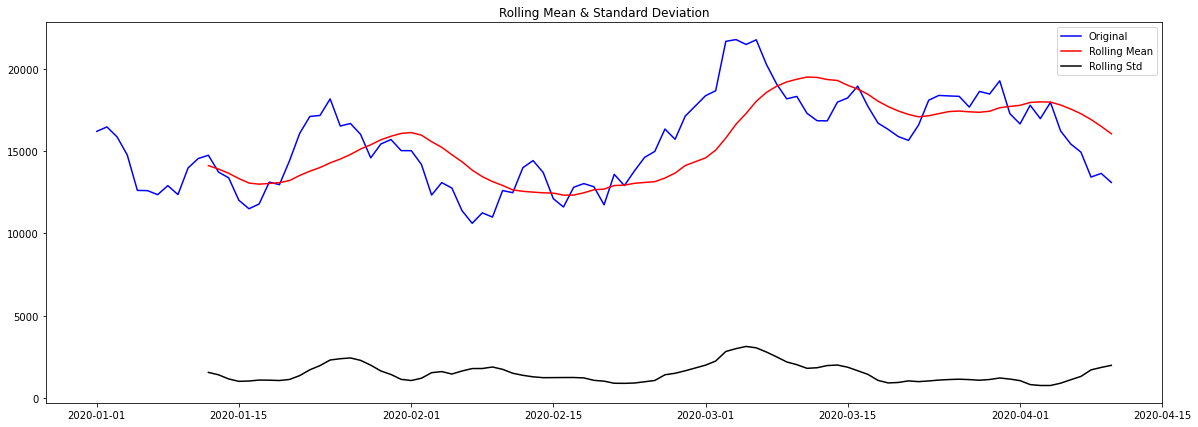

Results of Dickey-Fuller Test:
Test Statistic                 -2.447145
p-value                         0.128870
#Lags Used                      2.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


In [78]:
test_stationarity(ts)

    ** If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.
    ** In Our case test-statistic is high in negative value thus, the data set has seasonality.
    ** Visually as well we can observe via rolling mean.

#### Handle Stationarity 

    ** There are 2 major reasons behind non-stationarity of a Time Series:
            1. Trend –- varying mean over time.
            2. Seasonality –- variations at specific time-frames. 
            
    ** Transformation which penalize higher values more than smaller values can help in reduction of trends : I have used
       Log Transformation.
    ** I will use differencing technique to eliminate Tread and Seasonality

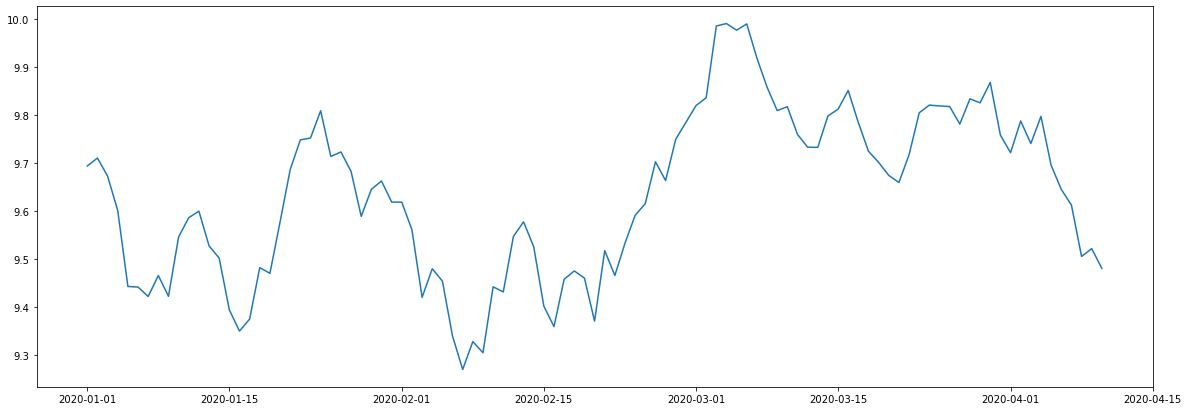

In [79]:
ts_log = np.log(ts)
plt.figure(figsize=(20, 7))
plt.plot(ts_log)

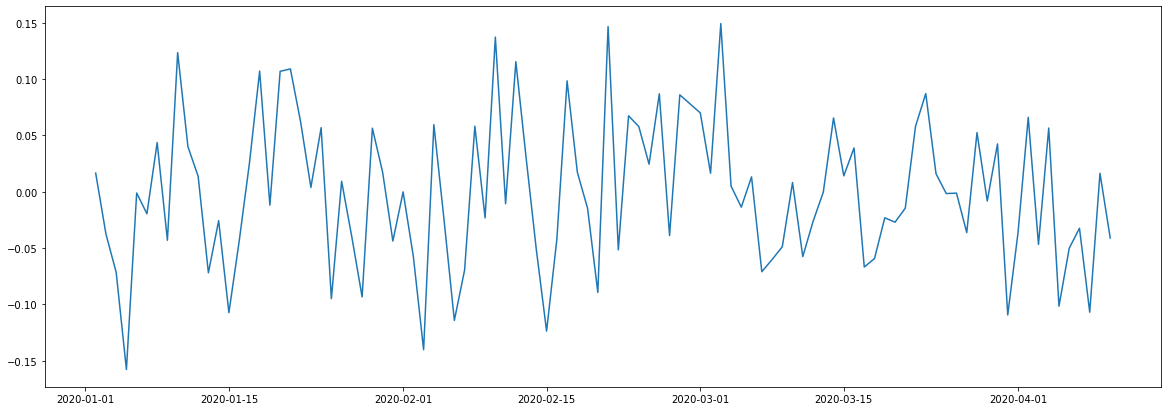

In [80]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(20, 7))
plt.plot(ts_log_diff)

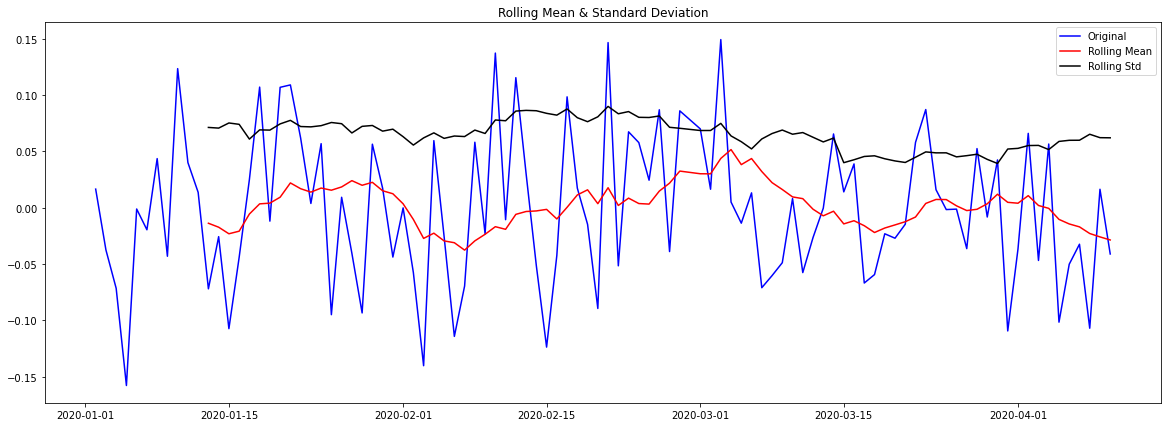

Results of Dickey-Fuller Test:
Test Statistic                 -5.600934
p-value                         0.000001
#Lags Used                      1.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


In [81]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

    ** We can see that the mean and std variations have small variations with time. 
       Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99%
       confidence. 

#### Time Series Modeling : Auto-Regressive Integrated Moving Averages (ARIMA)

##### ARIMA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

Text(0.5, 1.0, 'RSS: 0.3584')

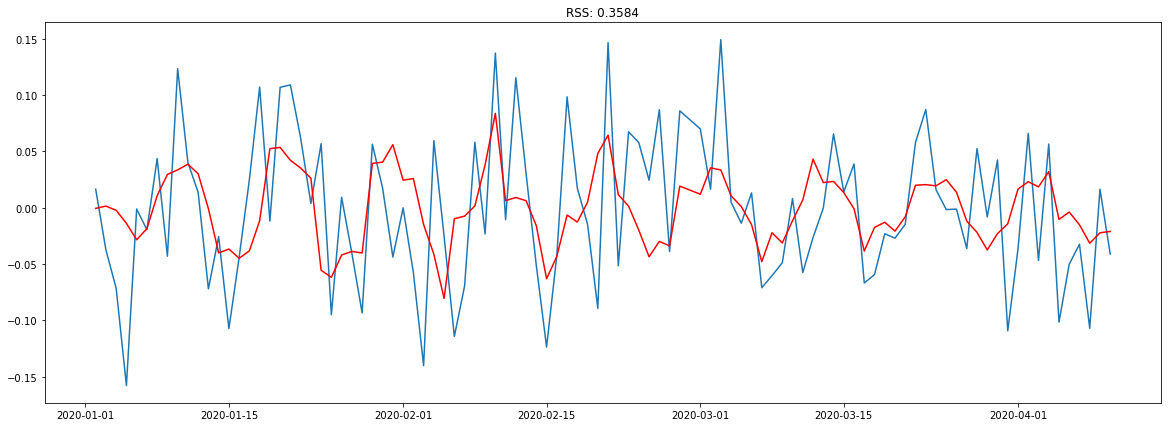

In [286]:
model = ARIMA(ts_log, order=(5, 1, 6))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(20, 7))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

#### Model Evaluate

In [277]:
predictions_ARIMA_diff_cumsum = pd.Series(results_ARIMA.fittedvalues,
                                          copy=True).cumsum()

In [278]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[:], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(
    predictions_ARIMA_diff_cumsum, fill_value=0)

Text(0.5, 1.0, 'RMSE: 872.7016')

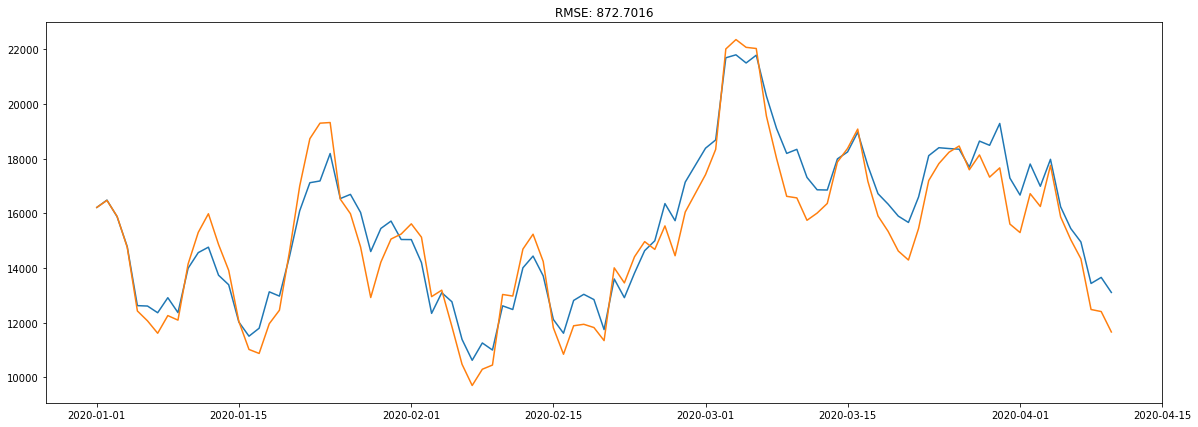

In [279]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20, 7))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

#### Model Forecast

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


(<Figure size 1440x432 with 1 Axes>, Text(0.5, 1.0, 'RMSE: 872.7016'))

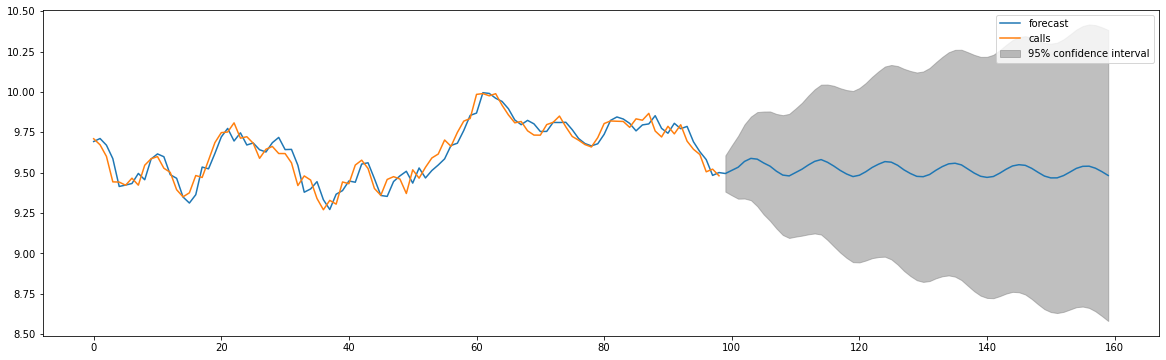

In [280]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
results_ARIMA.plot_predict(1, 160, ax=ax), _

In [281]:
forecast_df = pd.DataFrame()
forecast_df['date'] = pd.to_datetime(
    pd.date_range(pd.to_datetime('4/11/2020', format='%m/%d/%Y'),
                  periods=60).tolist())
forecast_df['calls'] = np.exp(
    pd.Series(results_ARIMA.forecast(60)[0]).add(
        pd.Series(
            pd.Series(results_ARIMA.predict(start=100, end=159,
                                            dynamic=True)).cumsum().tolist())))
forecast_df.index = forecast_df.date
forecast_df.drop(columns=['date'], inplace=True)
forecast_df = forecast_df.calls

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [282]:
forecast_df

date
2020-04-11    13479.924462
2020-04-12    14023.378176
2020-04-13    14569.607790
2020-04-14    15657.435452
2020-04-15    16257.592749
2020-04-16    16102.401938
2020-04-17    15362.400916
2020-04-18    14765.823125
2020-04-19    13872.394829
2020-04-20    13221.516834
2020-04-21    13086.981985
2020-04-22    13638.196330
2020-04-23    14216.483231
2020-04-24    14982.250572
2020-04-25    15671.978389
2020-04-26    16016.065240
2020-04-27    15496.697428
2020-04-28    14781.311333
2020-04-29    14008.629186
2020-04-30    13400.210891
2020-05-01    12979.675684
2020-05-02    13197.765889
2020-05-03    13776.373227
2020-05-04    14528.480819
2020-05-05    15130.265147
2020-05-06    15621.123807
2020-05-07    15513.279855
2020-05-08    14925.070974
2020-05-09    14097.737091
2020-05-10    13479.964220
2020-05-11    13014.820423
2020-05-12    12959.763186
2020-05-13    13313.789897
2020-05-14    14035.963667
2020-05-15    14690.343056
2020-05-16    15198.064104
2020-05-17    15308.327

## Question 5: Data Analysis

A new startup, EZ Yard, has recently caught the attention of Frontdoor leadership due to its relevance in "taking the hassle out of home ownership".  EZ Yard promises to keep your yard beautiful for a monthly subscription.

The founders of EZ Yard have recently approached Frontdoor, to see if Frontdoor would be interested in acquiring their company.  As a Data Scientist at Frontdoor, you have been asked to help evaluate if acquiring EZ Yard would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, would you recommend acquisition of EZ Yard as a long-term investment, and explain why or why not.


**EZ Yard Fact Sheet; Helping you have a green lawn without the hassle**

* EZ Yard posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2020, EZ Yard is growing its customer base by 10%.
* There was a new service offerings release in November of 2020, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2021 gain for new customers was a 120% improvement over of January of 2020. 
* Since January of 2020, EZ Yard has grown its customer base by 1,841%.
* EZ Yard boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2020, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2020, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-20 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-20 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-20 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-20 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-20 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-20 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-20 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-20 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-20 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-20 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-20 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-20 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-21 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-21 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 

*Bonus Question:* What other data sources would be helpful in making your recommendation? 

### Answer 5 : Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data=pd.read_csv("Question_5_Data.csv").fillna(0.0)

In [8]:
data

,Cohort,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Month 13
0,01-01-2020,1098,875.0,800.0,765.0,552.0,421.0,403.0,382.0,367.0,341.0,295.0,244.0,201.0,185.0
1,01-02-2020,1358,1019.0,996.0,826.0,713.0,524.0,500.0,495.0,389.0,301.0,257.0,178.0,133.0,0.0
2,01-03-2020,1257,892.0,741.0,705.0,648.0,498.0,395.0,205.0,168.0,132.0,121.0,84.0,0.0,0.0
3,01-04-2020,1587,1174.0,924.0,838.0,699.0,354.0,205.0,158.0,104.0,79.0,55.0,0.0,0.0,0.0
4,01-05-2020,1758,1213.0,1000.0,751.0,605.0,305.0,165.0,111.0,90.0,65.0,0.0,0.0,0.0,0.0
5,01-06-2020,1624,1137.0,954.0,754.0,403.0,248.0,205.0,165.0,100.0,0.0,0.0,0.0,0.0,0.0
6,01-07-2020,1541,1002.0,874.0,621.0,322.0,201.0,168.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0
7,01-08-2020,868,521.0,499.0,400.0,158.0,118.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,01-09-2020,1143,629.0,451.0,384.0,205.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,01-10-2020,1253,639.0,338.0,255.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    ** My answer entails a subjective approach towards the problem.
    ** My outcome hypothesis is completely driven by the assumption of my formula being correct. 
    ** Outline of my analysis would be as follows :
            1. Authenticate the numbers proposed by EZ
            2. Evaluate the data on two customer retention metric :
                    i.   Month-on-Month Customer Churn
                    ii.  Month-on-Month Customer Gain

#### Authenticate EZ Proposed Numbers 

##### Crunch Numbers 

In [27]:
data['Month 0'].sum()

22430

In [40]:
pd.Series(data['Month 0'].diff()/data['Month 0'].shift()).mean()*100

9.14978530381982

In [59]:
pd.Series(data['Month 0'].diff()/data['Month 0'].shift()).tolist()[-4]*100

46.44852354349561

In [67]:
sum([data.iloc[i].tolist()[-(i+1)] for i in range(0, 14)][-2:]) - \
    sum([data.iloc[i].tolist()[-(i+1)] for i in range(0, 14)][:-2])

2048.0

In [72]:
(data['Month 0'][12]-data['Month 0'][0])/data['Month 0'][0]*100

120.58287795992715

In [75]:
((data['Month 0'][1:].sum()-data['Month 0'][0])/data['Month 0'][0])*100

1842.8051001821493

    ** I have taken month-on-month churn rate for one year i.e. 2020
    ** % churn rate = (# of customer @ start of month -  # of customer @ end of month)/# of customer @ start of month
    ** % customer retention = 100 - % churn rate
    ** I took average of churn rate month-on month and calculated approximation of customer retention rate using
       above formula

In [110]:
(1 - np.mean([(data.iloc[i][1] - data.iloc[i][-(i + 1)]) / data.iloc[i][1]
              for i in range(0, 14)][:-2])) * 100

7.960876293276586

##### Observation

    ** Based on the numbers I crunched in lab following are my findings :
            a. Yes, numbers shows unique customer base of 22430.
            b. ~ 9.15% growth in customer base since the launch
            c. Yes, there is 46.44% bump in the new customers
            d. Their prediction is optimistic looking at the numbers in the starting months.
            e. Yes, the gain in new customer is ~ 120.58% improvement when compared to Jan-20
            f. Customer retention rate was found to be ~ 8% over 2020

##### Preliminary Inclination 

    ** Looking at the numbers shared EZ Yard Fact Sheet most of the numbers are in-line with what is advertised.
       However, the calculated retention rate is quite low and Hence, further analysis is required.
    ** If a comment is required at this point I would not recommend to go forward with this deal as ethically 
       propagating false numbers calls their culture and traditions for a question. 

#### Further Investigation

    ** I will not include 2021 data for this analysis as I am trying to understand the performance across an year and to include partial information that too which on a higher side. I run a risk of skewing my data and mis-leading the analysis

<AxesSubplot:title={'center':'New Customer Gain / Loss Month-On-Month'}, xlabel='Month-on-Month', ylabel='% Gain / Loss'>

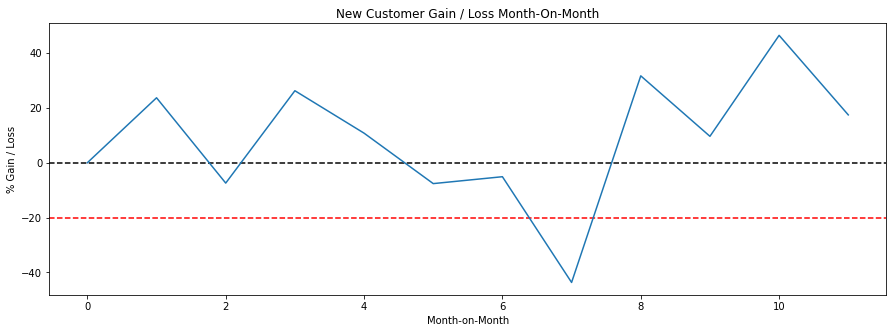

In [117]:
plt.figure(figsize=(15, 5))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=-20.0, color='r', linestyle='--')
plt.xlabel("Month-on-Month")
plt.ylabel("% Gain / Loss")
plt.title("New Customer Gain / Loss Month-On-Month")
pd.Series((data['Month 0'][:-2].diff()/data['Month 0']
           [:-2].shift())*100).fillna(0).plot()

    ** We can observe mostly their % is on the +ve side of the graph.
    ** However, a very interesting fact that can be observed here is a sudden dip in the customer acquisition for the month
       of Aug-20.
    ** I believe there is some causal relation between the dip and growth in Nov-20. I assume certain changes were made
       which got triggered by ~ 40 % customer loss.
    ** The changes seems to be taking a +ve turn and gain% has touched the maximum mark when compared across the year.
       Never-the-less we need more data for reliable prediction

<AxesSubplot:title={'center':'% Customer Churn - Month-On-Month'}, xlabel='Month-on-Month', ylabel='% Customer Churn'>

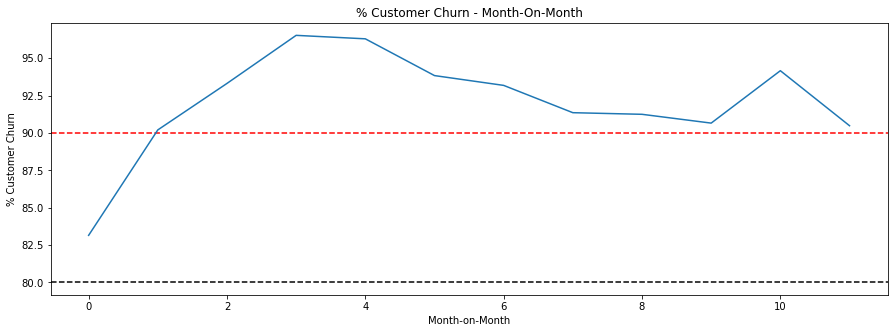

In [123]:
plt.figure(figsize=(15, 5))
plt.axhline(y=80.0, color='black', linestyle='--')
plt.axhline(y=90.0, color='r', linestyle='--')
plt.xlabel("Month-on-Month")
plt.ylabel("% Customer Churn")
plt.title("% Customer Churn - Month-On-Month")
pd.Series([((data.iloc[i][1] - data.iloc[i][-(i + 1)]) / data.iloc[i][1])*100
           for i in range(0, 14)][:-2]).plot()

    ** We can observe a start of the year increment in the churn.
    ** Across the year the churn seems to be more that 90% which mean retention is below 10% 

<AxesSubplot:title={'center':'% Customer Retention - Month-On-Month'}, xlabel='Month-on-Month', ylabel='% Customer Retained'>

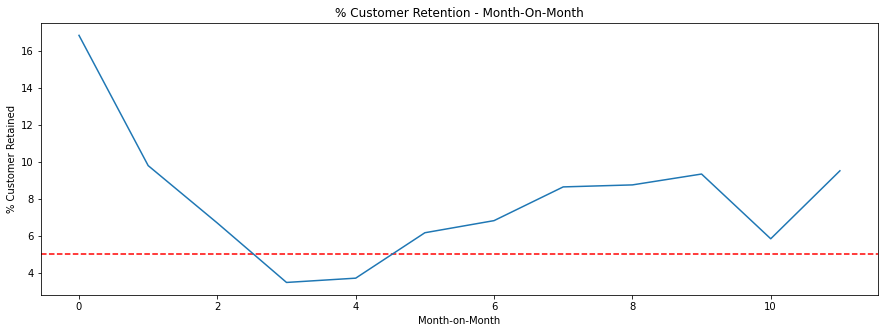

In [137]:
plt.figure(figsize=(15, 5))
plt.axhline(y=5.0, color='r', linestyle='--')
plt.xlabel("Month-on-Month")
plt.ylabel("% Customer Retained")
plt.title("% Customer Retention - Month-On-Month")
pd.Series([(data.iloc[i][-(i + 1)]/data.iloc[i][1])
           * 100 for i in range(0, 14)][:-2]).plot()

    ** Month-on-month % Customer Retention is very Low seldom it crosses 10% mark

#### Final Recommendations

    ** Looking at these numbers and charts I will "NOT" recommend for an acquisition "YET".
    ** For the year 2020 their retention rate is considerably low.
    ** However, the changes EZ has implemented in Nov-20 seems to have +ve impact.
    ** We need to wait for couple of months in the year 2021 such their mid-year numbers are in and if we still see the
       growth in the +ve direction then I would recommend for an acquisition.

#### Bonus 

    ** For giving a better recommendation I would require these following information :
        
            1. Revenue details of EZ such that I could calculate :
                    a. "Revenue Churn Rate"
                    b. "Existing customer Revenue Growth Rate"
            2. # of Loyal Customers of EZ
            3. I would also like to have the data on survey on the EZ service satisfaction to calculate 
               "Net Promoter's Score".